# COTATENIS SNEAKERS : Imbalanced multiclass classification on a dataset of sneakers

## Table of Contents
* [Introduction](#introduction)
* [The dataset](#the_dataset)
* [Requirements](#requirements)
* [Download and import data](#download_and_import_data)
* [Data exploration](#data_exploration)
* [Data visualization](#data_exploration)
* [Data preprocessing](#data_preprocessing)
* [Base model](#base_model)
* [Test your submission](#test_your_submission)

## Introduction

Sneakers are a type of footwear primarily designed for sports or other forms of physical exercise. They typically feature a flexible sole made of rubber or synthetic material and an upper part made of leather, synthetic material, or fabric. Sneakers come in various styles, including running shoes, basketball shoes, or tennis shoes. Sneakers are appreciated for their comfort and original designs, and are often bought and used outside of any sport context, as casual daily shoes. The sneakers market thus faces a massive and increasing demand for new original pairs, as well as sustainable and ethically made footwear. For instance, so far in 2024, the revenue in the Sneakers segment of the United States amounts to US$ 23.40bn.

In this context, the need of classification models arises, to be able to efficiently discriminate between different types and models of sneakers. Indeed, a sneaker classification model can offer significant benefits across various sectors of the footwear industry, ranging from enhancing the retail experience to supporting supply chain management and marketing efforts. For instance, such a model can be used by e-commerce and retail professionnals, to automatically categorize and tag products, in order to improve search and recommendation systems. Brands and retailers can also use classification models to streamline inventory management processes by accurately identifying and tracking different sneaker models in stock. This helps optimize stock levels, reduce overstocking or stockouts, and improve overall operational efficiency. Finally, brands can leverage sneaker classification models to monitor social media platforms for user-generated content featuring their products. Indeed, this can enable them to track brand mentions, and measure the impact of marketing campaigns within the sneaker community.

However, due to the variety of shapes and designs that come with the commercialized sneaker pairs, identifying their associated brand can prove tricky, especially when dealing with uncommon models, that are not often seen on the market. The goal of this challenge is thus to build a model that is able to determine the brand associated to a sneaker pair, from a dataset of images showing sneakers of different brands.

## The dataset

For this challenge, the data were first preprocessed and split in order to preserve a private test set on which to evaluate the models on our servers. This leaves 6971 observations in the public train set and 2988 observations in the public test set. Each sample of the dataset is an image (its filename) showing a sneaker pair (sometimes only one shoe), and comes with a label which corresponds to the brand of the sneakers that appear on the image. In this challenge's dataset, we work with sneaker pairs of three different brands : Adidas, Nike and Jordan. Also, all the images in the available data are "brochure" pictures, and often correspond to pictures of sneaker pairs taken in front of a white background.

## Requirements

In [1]:
import os
import pandas as pd
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import functional as F
from torchvision import transforms

from cotatenis_sneakers.sneaker_dataset import SneakerDataset
from cotatenis_sneakers.sneaker_transforms import (
    get_transform_notebook,
    UnNormalize,
    PadToSize,
)

## Download and import data

In [ ]:
_download_ = False # Set this boolean to True to download the data
folder = "data/public"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

Before trying to download the data, make sure that you set up your Kaggle credentials appropriately.

In [4]:
if _download_:
    os.system("python download_data.py")
    os.system("python data/prepare_data.py")

## Data exploration

First, let's load the available datasets, using the `SneakerDataset` class. Note that we instantiate the datasets with the `transform` argument, which corresponds to a predefined sequence of preprocessing operations that will be applied to the images. More on this preprocessing step later...

In [6]:
transform = get_transform_notebook()
train_data = pd.read_csv(f"{folder}/train/train.csv")
train_dataset = SneakerDataset(
    train_data, folder=f"{folder}/train", device=device, transform=transform
)
test_data = pd.read_csv(f"{folder}/test/test.csv")
test_dataset = SneakerDataset(
    test_data, folder=f"{folder}/test", device=device, transform=transform
)

As mentioned earlier, each sample of the raw dataset is a (image_filename, label) pair :

In [8]:
train_data.head()

,0,1
0,CD7510-001_Tenis-Nike-Air-Barrage-Low-Masculin...,Nike
1,CD5079-101_Tenis-Nike-PG-4-Masculino-Multicolo...,Nike
2,833656-103_833656_Tenis-Nike-Court-Royale-TDV-...,Nike
3,833412-402_833412_Tenis-Nike-Air-Max-90-GS-Lea...,Nike
4,CK9183-106_CK9183_Tenis-Jordan-Zoom-92-Masculi...,Jordan


Once the data is loaded through the `SneakerDataset` class, each sample of the dataset is now a (tensor, one_hot_encoded_label) pair :

In [7]:
train_dataset[0]

(tensor([[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],
 
         [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          ...,
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],
 
         [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ...,

In [8]:
len(train_dataset), len(test_dataset)

(6971, 2988)

## Data visualization

To understand the images we are working with, let's visualize some of them :

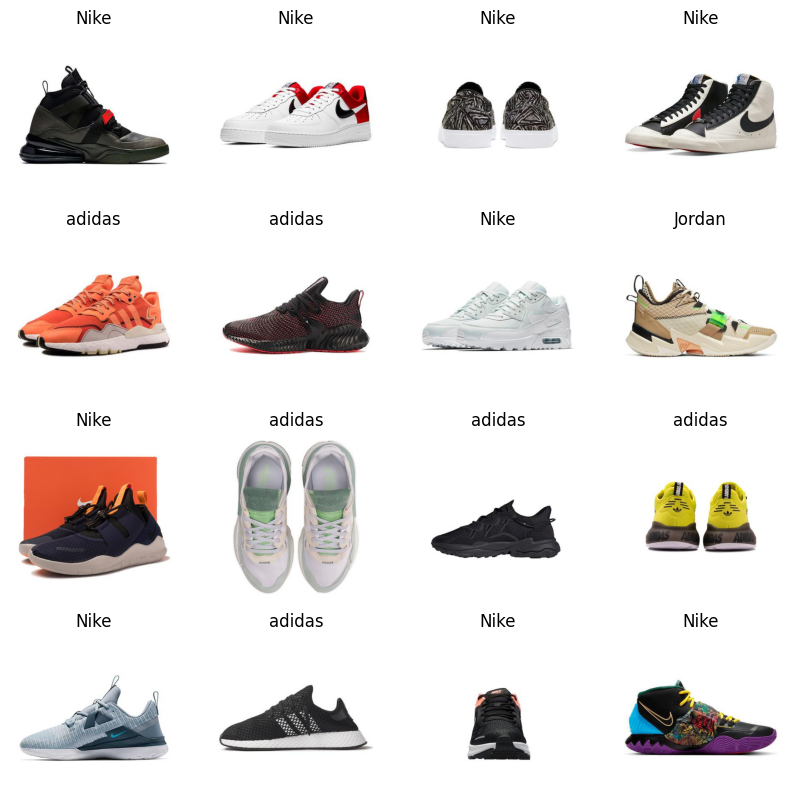

In [9]:
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        rint = np.random.randint(train_dataset.data.shape[0])
        img, brand = train_dataset.get_untransformed_tuple(rint)
        ax[i, j].imshow(img)
        ax[i, j].set_title(brand)
        ax[i, j].axis("off")
plt.show()

It may be useful to note that the data is imbalanced, as can be seen below :

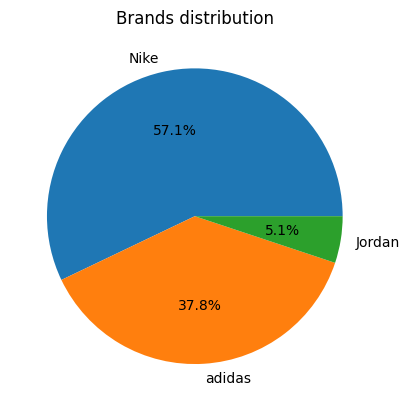

In [10]:
# labels distribution
brands = train_dataset.labels.value_counts()
plt.pie(brands, labels=brands.index, autopct="%1.1f%%")
plt.title("Brands distribution")
plt.show()

Additionnally, all the images don't necessarily have the same dimension, so we need to preprocess them accordingly :

In [11]:
print(
    "All images have the same dimensions:",
    all(
        [
            train_dataset.get_untransformed_tuple(i)[0].size
            == train_dataset.get_untransformed_tuple(0)[0].size
            for i in range(len(train_dataset))
        ]
    ),
)

d:\COURS\A5\Datacamp\ramp-kits-cotatenis-sneakers\cotatenis_venv\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


All images have the same dimensions: False


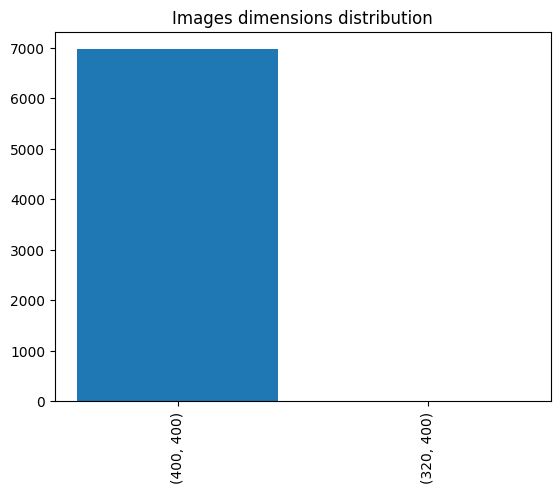

In [12]:
sizes = [
    str(train_dataset.get_untransformed_tuple(i)[0].size)
    for i in range(len(train_dataset))
]


sizes = pd.Series(sizes).value_counts()


plt.bar(sizes.index, sizes.values)


plt.xticks(rotation=90)


plt.title("Images dimensions distribution")


plt.show()

## Data preprocessing

Preprocessing is done thanks to the `transform` parameter of the sneaker dataset. You can find the details of each step in `cotanis_sneakers/sneaker_transforms.py`. The images are padded so that they all have the same size. They are also normalized.

Text(0.5, 1.0, 'Transformed image\nwith denormalisation')

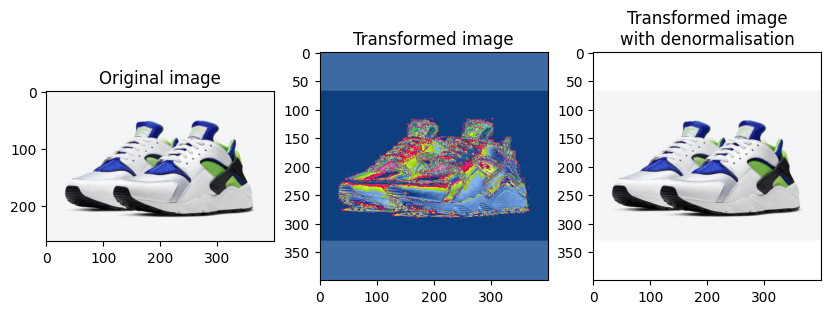

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(test_dataset.get_untransformed_tuple(752)[0])
axs[0].set_title("Original image")

axs[1].imshow(F.to_pil_image(test_dataset[752][0]))
axs[1].set_title("Transformed image")

unnorm = UnNormalize()
axs[2].imshow(F.to_pil_image(unnorm(test_dataset[752][0])))
axs[2].set_title("Transformed image\nwith denormalisation")

## Base model

### Training

Now that you explored the available data, you can start building the desired classification model.

In [14]:
if device == "cuda":
    train_loader = DataLoader(
        train_dataset, batch_size=32, shuffle=True, pin_memory=True
    )
else:
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [15]:
# load a pretrained model for image classification
model = torch.hub.load("pytorch/vision", "mobilenet_v2", pretrained=True)
for param in model.parameters():
    param.requires_grad = False
model.classifier[1] = torch.nn.Linear(model.last_channel, 3)

for param in model.classifier.parameters():
    param.requires_grad = True

model = model.to(device)

Using cache found in C:\Users\orteg/.cache\torch\hub\pytorch_vision_main
d:\COURS\A5\Datacamp\ramp-kits-cotatenis-sneakers\cotatenis_venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\COURS\A5\Datacamp\ramp-kits-cotatenis-sneakers\cotatenis_venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
# fine-tune the model
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

n_epochs = 5
print_every = 100
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % print_every == 0 and i != 0:
            print(f"Epoch : {epoch}, Iteration : {i}, Loss: {running_loss / 10:.3f}")
            running_loss = 0.0

Epoch : 0, Iteration : 100, Loss: 7.946


d:\COURS\A5\Datacamp\ramp-kits-cotatenis-sneakers\cotatenis_venv\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch : 0, Iteration : 200, Loss: 6.750
Epoch : 1, Iteration : 100, Loss: 6.379
Epoch : 1, Iteration : 200, Loss: 6.163
Epoch : 2, Iteration : 100, Loss: 6.141
Epoch : 2, Iteration : 200, Loss: 5.711
Epoch : 3, Iteration : 100, Loss: 5.850
Epoch : 3, Iteration : 200, Loss: 5.701
Epoch : 4, Iteration : 100, Loss: 5.581
Epoch : 4, Iteration : 200, Loss: 5.884


### Prediction

Once your model is trained, you can evaluate it on the test dataset :

In [17]:
if device == "cuda":
    test_loader = DataLoader(
        test_dataset, batch_size=32, shuffle=False, pin_memory=True
    )
else:
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [18]:
model.eval()
correct = 0
total_correct = 0
total = 0


print_every = 10

with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == torch.max(labels, 1)[1]).sum().item()

        if i % print_every == 0 and i != 0:
            print(f"Iteration {i}, accuracy: {correct / total}")
            total_correct += correct
            correct = 0
            total = 0


print("Total correct", total_correct)
print("Total images", test_dataset.data.shape[0])
accuracy = total_correct / test_dataset.data.shape[0]
print(f"Test Accuracy: {accuracy}")

Iteration 10, accuracy: 0.1875
Iteration 20, accuracy: 0.16875
Iteration 30, accuracy: 0.203125
Iteration 40, accuracy: 0.15625
Iteration 50, accuracy: 0.1625
Iteration 60, accuracy: 0.175
Iteration 70, accuracy: 0.1875
Iteration 80, accuracy: 0.178125
Iteration 90, accuracy: 0.165625
Total correct 513
Total images 2988
Test Accuracy: 0.1716867469879518


## Test your submission

Finally, once you built a working model and have a submission ready, you can test it here before actually submitting your code on the platform : 

In [19]:
! ramp-test --submission starting_kit

Testing Sneakers brand classification
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions\starting_kit ...
CV fold 0
Epoch 0, Iteration 50, Loss: 0.8468153214454651
Epoch 0, Iteration 100, Loss: 0.712579562664032
Epoch 0, Iteration 150, Loss: 0.7047641354799271
Epoch 1, Iteration 50, Loss: 1.0001049214601516
Epoch 1, Iteration 100, Loss: 0.6242965322732925
Epoch 1, Iteration 150, Loss: 0.65222627222538
	score  bal_acc    acc       time
	train    0.552  0.781  61.494741
	valid    0.554  0.782  76.017329
	test     0.542  0.766  31.892059
----------------------------
Mean CV scores
----------------------------
	score      bal_acc          acc        time
	train  0.552 ± 0.0  0.781 ± 0.0  61.5 ± 0.0
	valid  0.554 ± 0.0  0.782 ± 0.0  76.0 ± 0.0
	test   0.542 ± 0.0  0.766 ± 0.0  31.9 ± 0.0
----------------------------
Bagged scores
----------------------------
	score  bal_acc    acc
	valid    0.544  0.760
	test     0.537  0.752


Using cache found in C:\Users\orteg/.cache\torch\hub\pytorch_vision_main
D:\COURS\A5\Datacamp\ramp-kits-cotatenis-sneakers\cotatenis_venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\COURS\A5\Datacamp\ramp-kits-cotatenis-sneakers\cotatenis_venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
D:\COURS\A5\Datacamp\ramp-kits-cotatenis-sneakers\cotatenis_venv\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warning